In [38]:
"""
PHYS460-660 python skeleton code for project 2
"""
from numpy import abs
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

def update(x1old, v1old, x2old, v2old, dt):
    g = 1 # Gravitational acceleration is 1.0 in normalized units
    
    # Proper update according to the
    # midpoint method [in the order shown since formulas for, e.g., x1(i+1)
    #r equires both v1(i) and v1(i+1)]
    
    v1new = v1old - g*dt
    v2new = v2old - g*dt
    x1new = x1old + dt*((v1new + v1old)/2)
    x2new = x2old + dt*((v2new + v2old)/2)
    
    return x1new, v1new, x2new, v2new

def chaos_balls(m1,m2,x1ini,v1ini,x2ini,v2ini):
    # The function computes Poincare cross section for the problem of two 
    # colliding balls in one dimension with gravity 

    g=9.81
    #PARAMETERS
    dt=1.e-4; #time step size in normalized units
    time_steps=2**22; #number of time steps (which defines duration of evolution) 
    eps = 2.2204*(10**-16)
    #VARIABLES
    #m1,m2 - masses
    #x1ini,v1ini - initial position and velocity of ball 1
    #x2ini, v2ini - initial position and velocity of ball 2

    #Calculate Initial Energy
    
    mm = m1 + m2
    
    Eini=0.5*m1*(v1ini**2)+0.5*m2*(v2ini**2)+(m1*g*x1ini)+(m2*g*x2ini)
    print('Non-normalized Initial Energy = ',Eini)
    x1ininorm=(x1ini*mm*g)/(Eini)
    x2ininorm=(x2ini*mm*g)/(Eini)
    v1ininorm=v1ini/(np.sqrt(Eini/mm))
    v2ininorm=v2ini/(np.sqrt(Eini/mm))
    
    Eininorm = 0.5*(m1*v1ininorm**2 + m2*v2ininorm**2)/mm + (m1*x1ininorm + m2*x2ininorm)/mm
    print('Initial Energy = ',Eininorm)
    if abs(Eininorm - 1.0) > 1.e-6:
        print('\nInitial Energy not equal to 1. Stopping execution.\n')
        return
    
    
    x1 = np.zeros(time_steps)
    v1 = np.zeros(time_steps)
    x2 = np.zeros(time_steps)
    v2 = np.zeros(time_steps)
    time = np.zeros(time_steps)
    x2ps = []
    v2ps = []
    
    # Initial Conditions
    x1[0] = x1ininorm
    v1[0] = v1ininorm
    x2[0] = x2ininorm
    v2[0] = v2ininorm
    
    # Evolve differential equations using midpoint method and conserve
    # energy and momentum when the balls collide
    for i in range(0,time_steps-1):
        time[i+1] = time[i] + dt
        x1[i+1],v1[i+1],x2[i+1],v2[i+1] =  update(x1[i],v1[i],x2[i],v2[i],dt)
        
        if abs((x2[i+1]-x1[i+1])<eps or (x2[i+1]-x1[i+1])<0):
            # Update velocities here following conservation of energy and momentum
            v1_hold = v1[i]
            v1[i] = (v1[i]*(m1-m2)+(2*m2*v2[i]))/(m1+m2)
            v2[i] = (v2[i]*(m2-m1)+(2*m1*v1_hold))/(m1+m2)
            
            #after setting new velocities, call function update again to
            #recompute coordinates and velocity at i+1 step using new v1,v2
            #after the collision
            x1[i+1],v1[i+1],x2[i+1],v2[i+1] =  update(x1[i],v1[i],x2[i],v2[i],dt)
            
            x2ps.append(x2[i])
            v2ps.append(v2[i])
            
            
        elif (x1[i+1] < eps): # Did first ball hit the floor?
            v1[i] = -v1[i]
            x1[i] = abs(x1[i]) # this can be useful to prevent ball falling through the floor
            
            #after setting new velocity v1, call function update again to
            #recompute coordinates and velocity at i+1 step using new v1(i)
            #after the collision
            x1[i+1],v1[i+1],x2[i+1],v2[i+1] =  update(x1[i],v1[i],x2[i],v2[i],dt)
            
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x2ps,v2ps,'o')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.set_title("Poincaré Section")
    ax.set_ylabel("Velocity")
    ax.set_xlabel("Position")
    
    fig.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(time,x2)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.axes.set_xlim(0,100)
    ax.set_title("Position vs. Time")
    ax.set_ylabel("Position")
    ax.set_xlabel("Time")
    fig.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(time,x1,color='r',label="Bottom Ball")
    ax.plot(time,x2, color='k',label="Top Ball")
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.axes.set_xlim(0,100)
    ax.set_title("Position vs. Time")
    ax.set_ylabel("Position")
    ax.set_xlabel("Time")
    ax.legend()
    fig.show()
    auto_corr(x1)

#Autocorrelation Function

def auto_corr(x_pos):
    C=[]
    N=len(x_pos)
    for lag in range(0,N-1,int(N/100)):
        n=0
        total=0
        
        for i in range(1,N-lag):
            tmp = x_pos[i]*x_pos[i+lag]
            total+= tmp
            n+=1
        
        C.append(total/n)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(C)
    ax.set_title("Autocorrelation Function")
    ax.set_ylabel("Value")
    ax.set_xlabel("Time")
    fig.show()
    

Non-normalized Initial Energy =  287.18
Initial Energy =  1.0


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:132: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


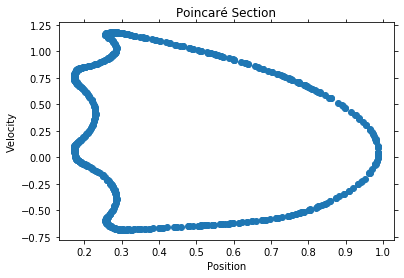

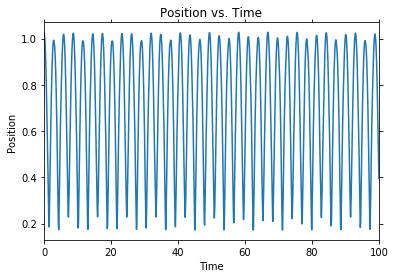

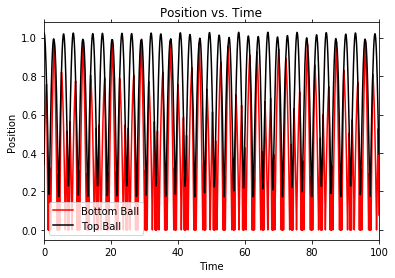

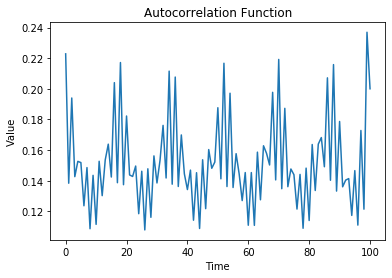

In [46]:
chaos_balls(1,9,1,5,3,0)